# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

# Part 2: (60 pts) Decision trees, Bagging, Random forest, boosting

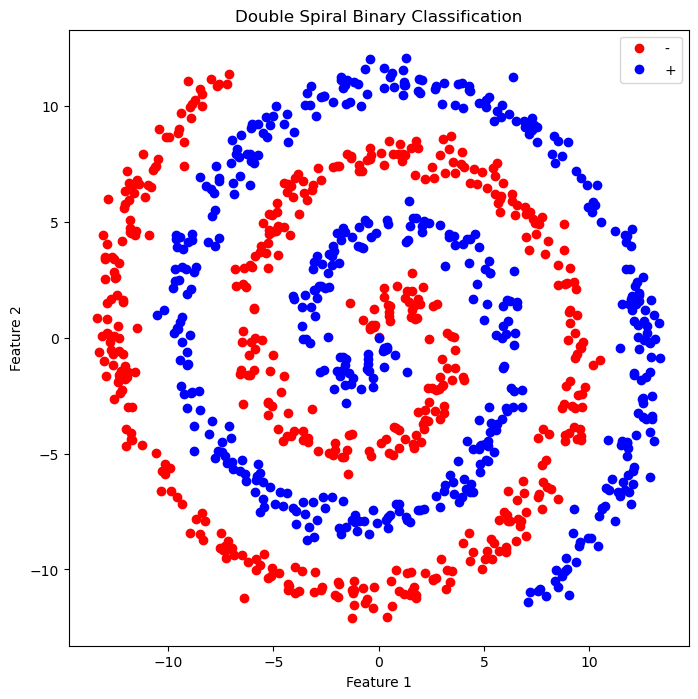

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_double_spiral(n_points, noise=0.5):
    """
    Create a double spiral dataset for binary classification.
    
    Parameters:
    - n_points: int, number of points in each spiral
    - noise: float, standard deviation of Gaussian noise added to the data
    
    Returns:
    - X: np.ndarray, feature matrix shape (n_points*2, 2)
    - y: np.ndarray, target vector shape (n_points*2,)
    """
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.randn(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.randn(n_points, 1) * noise
    X, y = (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), 
            np.hstack((np.zeros(n_points), np.ones(n_points))))
    return X, y

# Create double spiral data
n_points = 500
X_spiral, y_spiral = create_double_spiral(n_points, noise=0.5)

# Plot the dataset
plt.figure(figsize=(8, 8))
p0 = plt.plot(X_spiral[y_spiral == 0, 0], X_spiral[y_spiral == 0, 1], 'ro')
p1 = plt.plot(X_spiral[y_spiral == 1, 0], X_spiral[y_spiral == 1, 1], 'bo')
p0[0].set_label('-')
p1[0].set_label('+')
plt.title('Double Spiral Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

---
### Question 1: (5 pts) Training, Validation, and Testing on Double Spiral Data

You are provided with the `X_spiral` and `y_spiral` datasets representing the features and labels of a complex double spiral binary classification task. Your objective is to split this dataset into training, validation, and testing sets, train decision tree models of different depths on it, and evaluate their performance to select the best one. Follow the steps below and ensure to use the specified variable names for storing your results, as they will be used in the tests.

1. **Data Splitting (Variable Names: `X_train`, `X_val`, `y_train`, `y_val`):** 
   - First, split the `X_spiral` and `y_spiral` datasets into a training/validation set (`X_train_val`, `y_train_val`) and a test set (`X_test`, `y_test`), allocating 50% of the data for training/validation and 50% for testing. Ensure that your split is stratified.
   - Then, further split the `X_train_val` and `y_train_val` datasets into `X_train` and `X_val` for the features, and `y_train` and `y_val` for the labels, allocating 50% of the data for training and the remaining 50% for validation. Again, ensure that your split is stratified.

2. **Model Training and Validation (Variable Names: `clf1`, `clf10`, `val_accuracy1`, `val_accuracy10`):**
   - Train `clf1`, a decision tree classifier with a maximum depth of 1, using the `X_train` and `y_train` datasets, and evaluate its accuracy `val_accuracy1` on the `X_val` and `y_val` datasets.
   - Train `clf10`, another decision tree classifier but with a maximum depth of 10, using the same training data and evaluate its accuracy `val_accuracy10` on the validation set.
   - Name the best model `best_model`

3. **Model Testing (Variable Name: `test_accuracy`):** 
   - Determine the better-performing model between `clf1` and `clf10` based on their validation accuracies. Use the selected model to predict the labels of the `X_test` dataset and store the accuracy in the variable `test_accuracy`.

Ensure to set the `random_state` to 42 in all operations involving randomness to make your results reproducible.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# YOUR CODE HERE

#Build a test set on 50% of the data, putting the rest in a holder as it will be further divided
X_holder, X_test, y_holder, y_test = train_test_split(X_spiral, y_spiral, test_size = 0.5, random_state = 42, stratify = y_spiral)

#Build a training and validation set from the holder split created above.
X_train, X_val, y_train, y_val = train_test_split(X_holder, y_holder, test_size = 0.5, random_state = 42, stratify = y_holder)

clf1 = DecisionTreeClassifier(max_depth = 1, random_state = 42) #Initialize the 1-deep classifier
clf10 = DecisionTreeClassifier(max_depth = 10, random_state = 42) #Initialize the 10-deep classifier

clf1.fit(X_train, y_train) #Fit the 1-deep classifier based off of the training data
clf10.fit(X_train, y_train) #Fit the 10-deep classifier based off of the training data

predict1 = clf1.predict(X_val) #Predict based off of the 1-deep classifier
predict10 = clf10.predict(X_val) #Predict based off of the 10-deep classifier

val_accuracy1 = accuracy_score(predict1, y_val) #Get the validation accuracy for the 1-deep classifier
val_accuracy10 = accuracy_score(predict10, y_val) #Get the validation accuracy for the 10-deep classifier

#Added this as an if-else following the structure of the answer check below, despite knowing the answer through
#the printoffs and knowing it will not change due to the fixed random state. But why not, you know?

#If the 10-deep model has better accuracy, use it to predict on the test set
if val_accuracy1 < val_accuracy10:
    predictWhole = clf10.predict(X_test) #Predict on the test set using the 10-deep classifier

#If the 1-deep model has better accuracy, use it to predict on the test set    
else:
    predictWhole = clf1.predict(X_test) #Predict on the test set using the 1-deep classifier

test_accuracy = accuracy_score(predictWhole, y_test) #Predict on the test data based on the best model
# Print the results (optional, for verification purposes)
print(f"Validation Accuracy with Depth 1: {val_accuracy1:.2f}")
print(f"Validation Accuracy with Depth 10: {val_accuracy10:.2f}")

print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")


Validation Accuracy with Depth 1: 0.59
Validation Accuracy with Depth 10: 0.89
Test Accuracy with Best Model: 0.85


In [4]:
X_train.shape[0]

250

In [5]:
X_val.shape[0]

250

In [6]:
X_test.shape[0]

500

In [7]:
""" (5 pts) """
import numpy as np
from sklearn.metrics import accuracy_score

# Ensure the data is split correctly
assert X_train.shape[0] == 250, f"Expected 250 training samples but got {X_train.shape[0]}"
assert X_val.shape[0] == 250, f"Expected 250 validation samples but got {X_val.shape[0]}"
assert X_test.shape[0] == 500, f"Expected 500 test samples but got {X_test.shape[0]}"

# Ensure the models are trained and provide valid accuracies on the validation set
assert 0 <= val_accuracy1 <= 1, f"Invalid accuracy score {val_accuracy1} for model with depth 1"
assert 0 <= val_accuracy10 <= 1, f"Invalid accuracy score {val_accuracy10} for model with depth 10"

# Ensure the test accuracy is calculated using the better model from the validation set
better_val_accuracy = max(val_accuracy1, val_accuracy10)
better_model = clf1 if val_accuracy1 > val_accuracy10 else clf10
assert np.isclose(test_accuracy, accuracy_score(y_test, better_model.predict(X_test)), atol=1e-2), \
    f"Expected test accuracy {accuracy_score(y_test, better_model.predict(X_test))} but got {test_accuracy}"

### Question 2: (5 pts) Visualizing the Decision Boundary

#### Objective
In this question, your task is to create a function that visualizes the prediction surface of a given sklearn model. This will help you understand how different models capture and represent the underlying patterns in the data, especially in the context of the double spiral dataset.

#### Instructions
1. **Creating the Visualization Function (Function Name: `plot_decision_boundary`):**
    - Create a function named `plot_decision_boundary` that takes a sklearn model `model`, features `X`, and labels `y` as input and plots the decision boundary (or prediction surface) of the model along with the data points.
    - The function should plot the prediction surface for feature values ranging from -20 to 20 for both features. Use a suitable resolution to make the plot interpretable.

2. **Plotting the Prediction Surface:**
    - Use the `plot_decision_boundary` function to visualize the decision boundary of a trained model on the double spiral dataset.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    ###
    # Copied over from HW1 with minor changes, specifically upping the range to the 20's requested
    # and predicting based off of the model
    ###
    x = [] #Create a list to hold the grid
    
    #Create two linspaces, one to represent the x direction and the other the y
    x1 = np.linspace(-20, 20, 1000) 
    x2 = np.linspace(-20, 20, 1000) #I named this x2 instead of y as it represents the grid, which is the x in this code
    xgrid, ygrid = np.meshgrid(x1, x2) #Create a proper grid by combining the linspaces
    
    #See https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    x = np.c_[xgrid.ravel(), ygrid.ravel()] #Connect the grid together by raveling and using c_, which combines them into a 2d array
    y = model.predict(x) #Pass the x into the given function to get our y
    plt.contourf(xgrid,ygrid, y.reshape(xgrid.shape)) #Plot the grid with the correct function values
    
    ###
    
    ###
    # Pulled from the original plot above in order to have visual cohesion
    ###
    p0 = plt.plot(X_spiral[y_spiral == 0, 0], X_spiral[y_spiral == 0, 1], 'ro') #Plot the red dots of the spiral
    p1 = plt.plot(X_spiral[y_spiral == 1, 0], X_spiral[y_spiral == 1, 1], 'bo') #Plot the blue dots of the spiral
    p0[0].set_label('-') #Set the negative label for red dots
    p1[0].set_label('+') #Set the positive label for blue dots
    plt.title('Double Spiral Binary Classification With Decision Boundary') #Add a title
    plt.xlabel('Feature 1') #Add the x feature label
    plt.ylabel('Feature 2') #Add the y feature label
    plt.legend() #Show the legend of positive or negative values
    plt.grid(True) #Plot the grid
    plt.show() #Show the plot

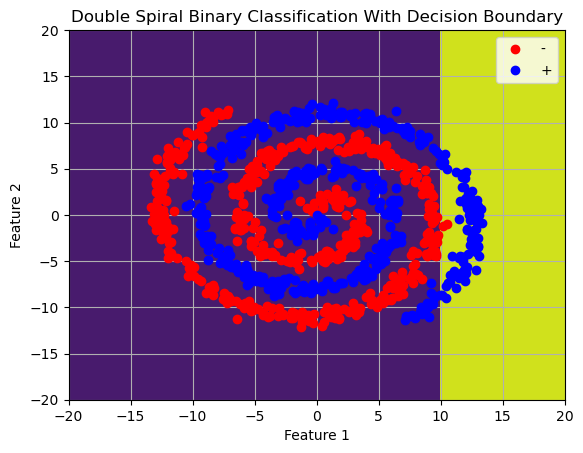

In [9]:
plot_decision_boundary(clf1, X_spiral, y_spiral)

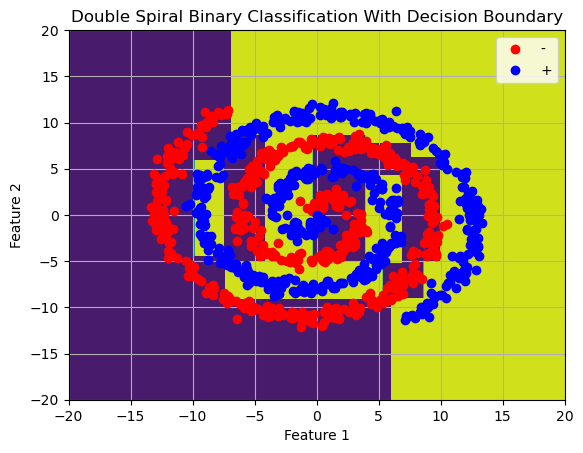

In [10]:
plot_decision_boundary(clf10, X_spiral, y_spiral)

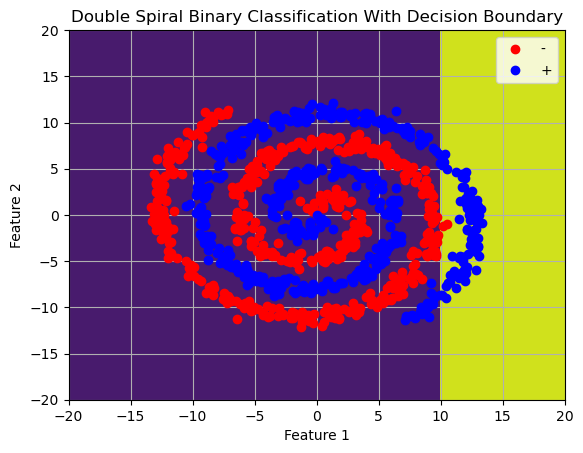

In [11]:
""" (10 pts) """
# Test 7: Check if calling plot_decision_boundary with clf1 doesn't throw an error
def test_no_error_with_clf1():
    try:
        plot_decision_boundary(clf1, X_spiral, y_spiral)
    except Exception as e:
        assert False, f"Calling plot_decision_boundary with clf1 raised an error: {str(e)}"
    plt.close()

test_no_error_with_clf1()

### Question 3: (10 pts) Analyzing Decision Tree Depth on Validation Performance and Estimating Test Error

#### Objective
In this exercise, you will explore the effect of the decision tree's depth on its performance, select the optimal depth based on validation accuracy, and estimate the test error of the model trained with the optimal depth. This will deepen your understanding of the model complexity, overfitting, underfitting, and the bias-variance trade-off.

#### Instructions

1. **Model Training and Validation Performance (Variable Names: `depths`, `val_accuracies`):**
    - Train decision tree classifiers of varying depths (from 1 to 100) on the `X_train` and `y_train` datasets and evaluate their performance on the `X_val` and `y_val` datasets. Store the depths in the `depths` list and the corresponding validation accuracies in the `val_accuracies` list.

2. **Plotting Validation Performance (Variable Name: `ax`):**
    - Plot the validation accuracies as a function of tree depth, label the axes, and provide a title for the plot.

3. **Choosing the Optimal Depth and Estimating Test Error (Variable Names: `optimal_depth`, `test_accuracy_optimal`):**
    - Choose the optimal tree depth that gives the highest validation accuracy and use it to train a model on the training data.
    - Evaluate the model on the test data to estimate the test error.

Optimal Depth: 12
Test Accuracy at Optimal Depth: 0.93


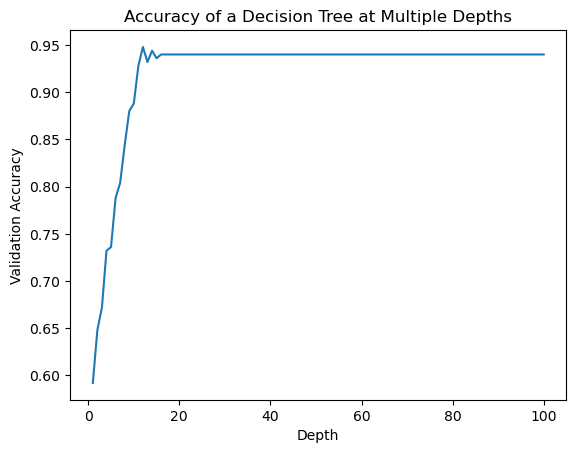

In [12]:
# Training decision trees of varying depths and plotting validation performance
depths = list(range(1, 101))  # Tree depths from 1 to 100
val_accuracies = []

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#For each depth, create a classifier and make its accuracy
for depth in depths:
    classifier = DecisionTreeClassifier(max_depth = depth, random_state = 42) #Build a classifier at the required depth
    classifier.fit(X_train, y_train) #Fit the classifier
    predict = classifier.predict(X_val) #Predict the validation based on the classifier
    val_accuracies.append(accuracy_score(predict, y_val)) #Add the predicted accuracy to the val_accuracies list

plt.plot(depths, val_accuracies) #Create a plot showing the different depths and accuracies
plt.xlabel("Depth") #Add an X-Label of Depth
plt.ylabel("Validation Accuracy") #Add a y-label of Validation Accuracy
plt.title("Accuracy of a Decision Tree at Multiple Depths") #Add a title for this plot

accuracies = list(zip(depths, val_accuracies)) #Zip together the depths and accuracies so that they are connected
optimal_depth = 0 #Create a holder variable for optimal depth
highest_accuracy = 0 #Create a holder variable for the highest accuracy attained

#For each depth and accuracy pair, see if it the most optimal. Store it if it is
for depth, accuracy in accuracies:
    
    #If this pairing is the current most optimal pair, update the optimal holder variables accordingly
    if accuracy > highest_accuracy:
        optimal_depth = depth #Update the optimal depth to the current depth
        highest_accuracy = accuracy #Update the highest accuracy to the current accuracy

optimal_clf = DecisionTreeClassifier(max_depth = optimal_depth, random_state = 42) #Build another classifier for the optimal depth
optimal_clf.fit(X_train, y_train) #Fit this classifier on the training data
optimal_predict = optimal_clf.predict(X_test) #Predict using the test data

test_accuracy_optimal = accuracy_score(optimal_predict, y_test) #Get the optimal training accuracy
# Print the optimal depth and test accuracy (optional)
print(f"Optimal Depth: {optimal_depth}")
print(f"Test Accuracy at Optimal Depth: {test_accuracy_optimal:.2f}")

# Show the plot
plt.show()

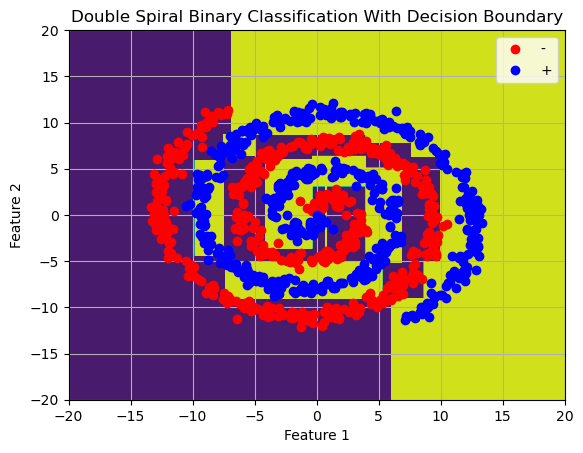

In [13]:
plot_decision_boundary(optimal_clf, X_spiral, y_spiral)

### Question 5:(5 pts) Analyzing and Visualizing the Effect of Number of Neighbors in K-Nearest Neighbors Classifier

#### Objective
In this exercise, you will not only analyze the effect of the number of neighbors on the performance of a K-Nearest Neighbors (KNN) classifier but also train a model with the optimal number of neighbors and visualize its decision boundary on the double spiral dataset.

#### Instructions
1. **Model Training and Validation Performance (Variable Names: `neighbors`, `knn_val_accuracies`):**
    - Train KNN classifiers with varying numbers of neighbors (from 1 to 15) on the `X_train` and `y_train` datasets.
    - Evaluate their performance on the `X_val` and `y_val` datasets.
    - Store the numbers of neighbors in the `neighbors` list and the corresponding validation accuracies in the `knn_val_accuracies` list.

2. **Choosing the Optimal Number of Neighbors (Variable Names: `optimal_neighbors`, `optimal_knn`):**
    - Identify the optimal number of neighbors that gives the highest validation accuracy.
    - Train a KNN classifier using this optimal number on the training data.

3. **Visualizing Decision Boundary:**
    - Use the `plot_decision_boundary` function to visualize the decision boundary of the `optimal_knn` classifier.

Optimal Number of Neighbors: 3


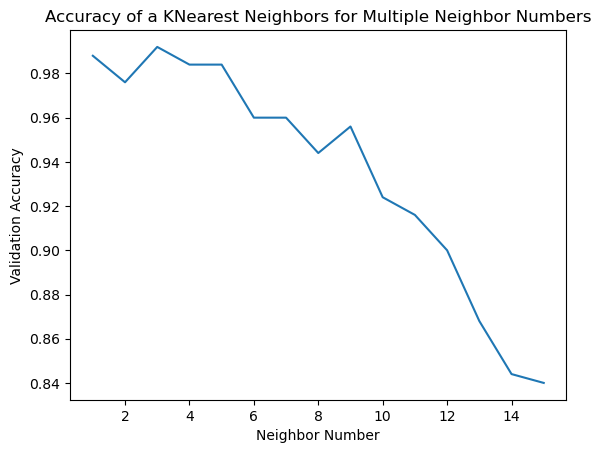

In [14]:
# Training KNN classifiers and plotting validation performance
neighbors = list(range(1, 16))
knn_val_accuracies = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Warning suppressor from https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn
#Added so I can actually see everything
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

for n_neighbors in neighbors:
    # YOUR CODE HERE
    classifier = KNeighborsClassifier(n_neighbors)
    classifier.fit(X_train, y_train)
    predictK = classifier.predict(X_val)
    knn_val_accuracies.append(accuracy_score(predictK, y_val))
    
plt.plot(neighbors, knn_val_accuracies) #Create a plot showing the different neighbor numbers and accuracies
plt.xlabel("Neighbor Number") #Add an X-Label of Neighbor Number
plt.ylabel("Validation Accuracy") #Add a y-label of Validation Accuracy
plt.title("Accuracy of a KNearest Neighbors for Multiple Neighbor Numbers") #Add a title for this plot

accuraciesK = list(zip(neighbors, knn_val_accuracies)) #Zip together the neighbor numbers and accuracies so that they are connected
optimal_neighbors = 0 #Create a holder variable for optimal knn
highest_accuracyK = 0 #Create a holder variable for the highest accuracy attained

#For each neighbor number and accuracy pair, see if it the most optimal. Store it if it is
for neighbor, accuracy in accuraciesK:
    
    #If this pairing is the current most optimal pair, update the optimal holder variables accordingly
    if accuracy > highest_accuracyK:
        optimal_neighbors = neighbor #Update the optimal depth to the current neighbor number
        highest_accuracyK = accuracy #Update the highest accuracy to the current accuracy

optimal_knn = KNeighborsClassifier(optimal_neighbors) #Build another classifier for the optimal neighbor number
optimal_knn.fit(X_train, y_train) #Fit this classifier on the training data

# Print the results (optional)
print(f"Optimal Number of Neighbors: {optimal_neighbors}")

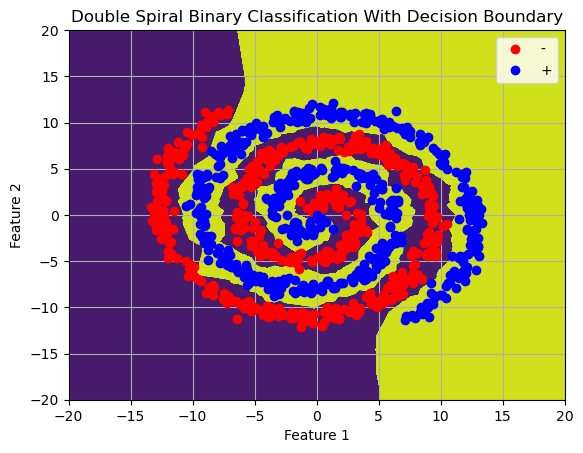

In [15]:
# Visualizing decision boundary of the optimal KNN model
plot_decision_boundary(optimal_knn, X_spiral, y_spiral)

**(5 pts)** What do you think about the decision boundary of the optimal knn model vs. tree model?

The trees started to get the swirl, but ultimately failed at creating a proper swirl. The KNN actually captured the swirl pretty smoothly. Heck, the KNN at lower neighbor number created a much smoother boundary in general than the blocky single decision tree. This caused a trade off in that the plot function took a while to generate. This is likely caused by the required smoothness of the model and the higher number of calculations required for neighbors.

### Question 6: (25 pts) Detailed Model Selection and Hyperparameter Tuning using Grid Search CV

#### Objective
In this exercise, you are tasked with employing [Grid Search Cross-Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to fine-tune hyperparameters for Random Forest, Bagging with decision trees, and AdaBoost classifiers. Your objective is to understand how these hyperparameters impact the model's performance and to select the best model and hyperparameters based on the validation dataset.

#### Instructions

1. **Hyperparameter Tuning with Grid Search CV (Variable Names: `best_rf`, `best_bagging`, `best_adaboost`):**
    - Utilize Grid Search CV to find the optimal hyperparameters for Random Forest, Bagging, and AdaBoost classifiers.
    - Each classifier has its own set of hyperparameters that you should experiment with, as detailed below.

    **Hints & Details on Hyperparameters:**
    - **Random Forest (`RandomForestClassifier`):**
        - `n_estimators`: Number of trees in the forest. Try values [50, 100, 150].
        - `max_depth`: Maximum depth of the trees. Try values [None, 10, 20], where None means the nodes are expanded until all leaves are pure or contain fewer samples than a specified number.

    - **Bagging (`BaggingClassifier` with decision trees as base estimators):**
        - `n_estimators`: Number of base estimators in the ensemble. Experiment with values [10, 20, 30].
        - `max_samples`: The proportion of randomly selected samples for each base estimator. Try values [0.5, 0.7, 1.0].

    - **AdaBoost (`AdaBoostClassifier`):**
        - `n_estimators`: Maximum number of estimators, at which boosting is terminated. Try values [30, 50, 70].
        - `learning_rate`: Learning rate shrinks the contribution of each classifier. Explore values [0.01, 0.1, 1].

2. **Model Selection (Variable Names: `best_model`, `best_model_name`):**
    - Evaluate the performance of the tuned classifiers on the validation set.
    - Determine the best model based on validation performance.

3. **Test Performance Estimation and Visualization (Variable Names: `best_model_test_accuracy`):**
    - Estimate the performance of the selected model on the test dataset.
    - Utilize the `plot_decision_boundary` function to visualize the decision boundary of the selected model.

In [16]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each classifier
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
param_grid_bagging = {'n_estimators': [10, 20, 30], 'max_samples': [0.5, 0.7, 1.0]}
param_grid_adaboost = {'n_estimators': [30, 50, 70], 'learning_rate': [0.01, 0.1, 1]}

# Create classifier objects
rf = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Create Grid Search objects
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_bagging = GridSearchCV(bagging, param_grid_bagging, cv=5)
grid_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5)

# Fit the models
best_rf = grid_rf.fit(X_train, y_train).best_estimator_
best_bagging = grid_bagging.fit(X_train, y_train).best_estimator_
best_adaboost = grid_adaboost.fit(X_train, y_train).best_estimator_

# YOUR CODE HERE
modelNames = ["Random Forest", "Bagging", "ADA Boost"] #Get the model names
predictRF = best_rf.predict(X_val) #Predict with the best random forest
predictBag = best_bagging.predict(X_val) #Predict with the best bagging classifier
predictBoost = best_adaboost.predict(X_val) #Predict with the best ada boost

accRF = accuracy_score(predictRF, y_val) #Get the accuracy of the random forest
accBag = accuracy_score(predictBag, y_val) #Get the accuracy of the bagging classifier
accBoost = accuracy_score(predictBoost, y_val) #Get the accuracy of the ada boost

accuracies = [accRF, accBag, accBoost] #Put the accuracies into a list to put together with the names
models = list(zip(modelNames, accuracies)) #Zip the accuracies together with their names

best_model_name = "" #Initialize an empty best model name
best_model_test_accuracy = 0 #Initialize a best model test accuracy

#For each model accuracy, find the model with the best accuracy
for name, acc in models:
    
    #If the accuracy is better than the current best, update them with the new best
    if acc > best_model_test_accuracy:
        best_model_test_accuracy = acc #Set the new best accuracy
        best_model_name = name #Set the name to the that of the new best
        
#If the best model is the random forest, set best model to the random forest
if best_model_name == "Random Forest":
    best_model = best_rf #Set the best model as the random forest
    
#If the best model is the bagging classifier, set best model to the bagging classifier
elif best_model_name == "Bagging":
    best_model = best_bagging #Set best model to the bagging classifier
    
#If the best model is not the bagging or forest, set it to the ada boost
else:
    best_model = best_adaboost #Set the best model to the ada boost

# Print the results (optional)
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy of Best Model: {best_model_test_accuracy:.2f}")

Best Model: Random Forest
Test Accuracy of Best Model: 0.95


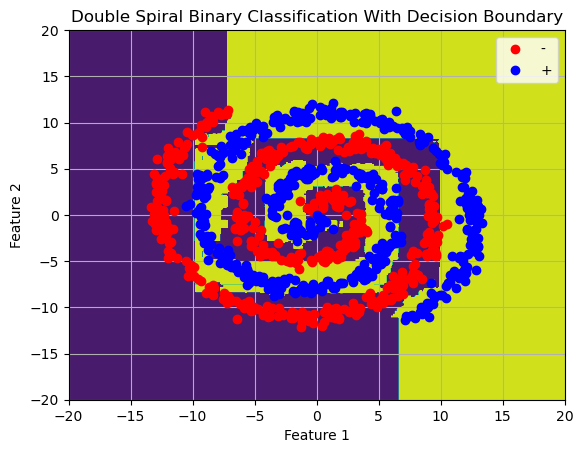

In [17]:
# Visualize decision boundary
plot_decision_boundary(best_model, X_spiral, y_spiral)